In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV And convert to **DataFrame**

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

# **Preprocessing**

**Shape of Data**

In [ ]:
df.shape

(10000, 14)

**All the Columns**

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## First Five **rows**

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Drop Useless Columns

In [ ]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)

**DataTypes of each column**

In [ ]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


**Check Null Values**

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


**Check Duplicates**

In [ ]:
df.duplicated().sum()

np.int64(0)

**Information of all columns**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


**Summary of numerical column**

In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df['Exited'].value_counts(normalize=True)


,proportion
Exited,
0,0.7963
1,0.2037


it is imbalanced
This will affect:

Model choice

Metrics

Sampling strategy

# **Exploratory Data Analysis (EDA)**

In [ ]:
num_data = df.select_dtypes(['float64','int64'])
n = num_data.columns

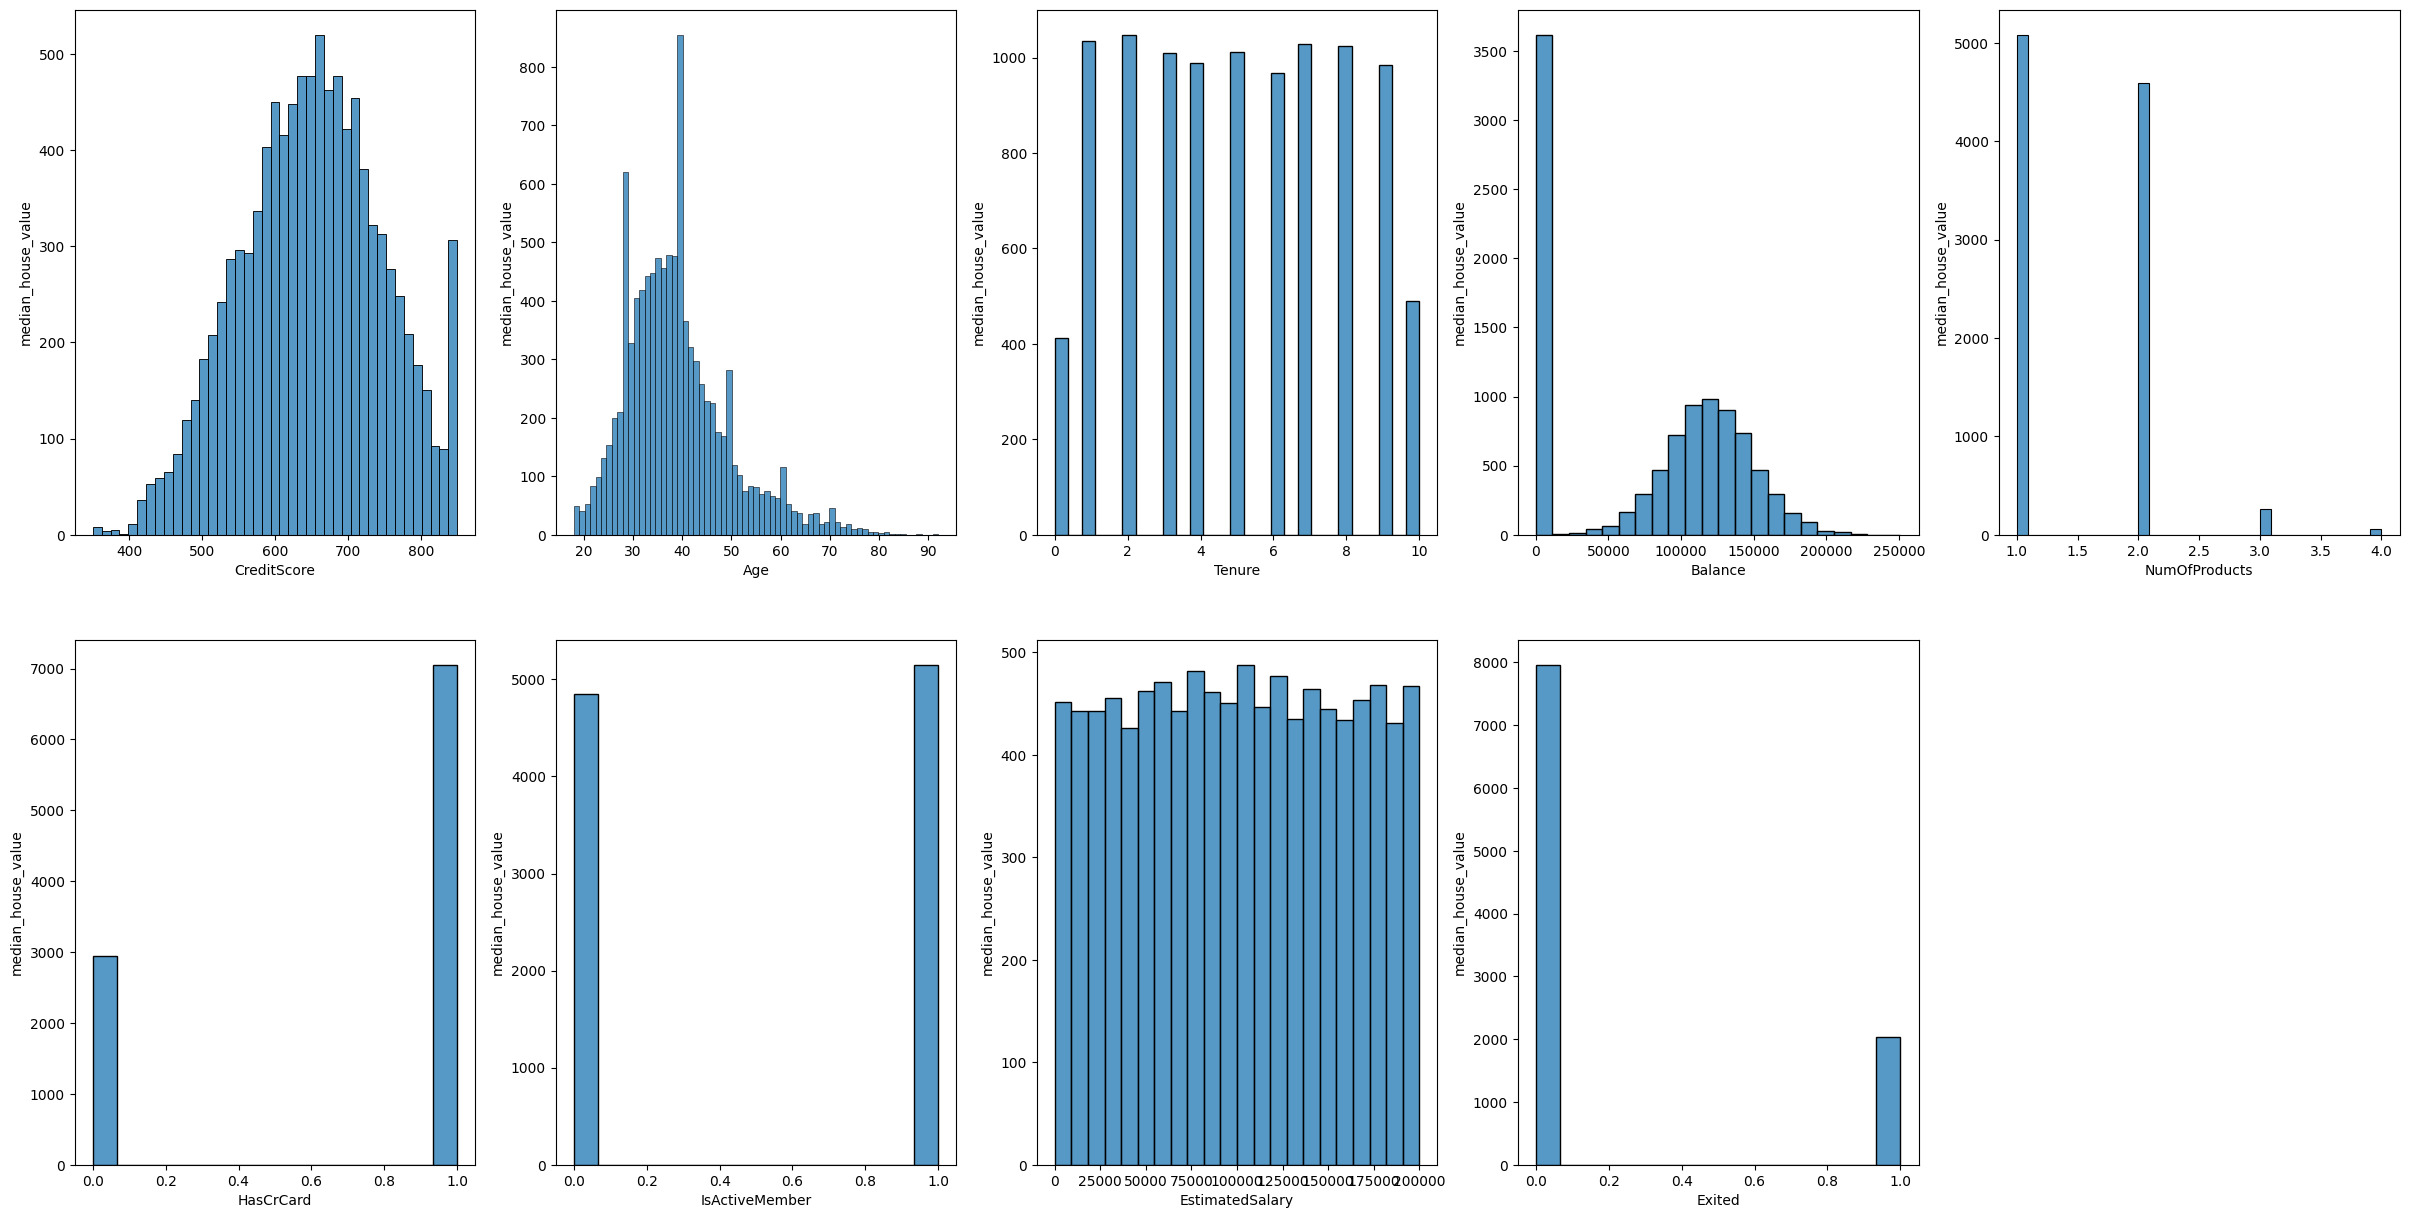

In [ ]:
plt.figure(figsize=(30,15))
def fn1(n):
  for idx, i in enumerate(n,1):
    plt.subplot(2,5,idx)
    sns.histplot(df[i])
    plt.xlabel(i)
    plt.ylabel('median_house_value')
  plt.show()
fn1(n)

In [ ]:
def show_fig():
    plt.tight_layout()
    plt.show()
plot_no = 1

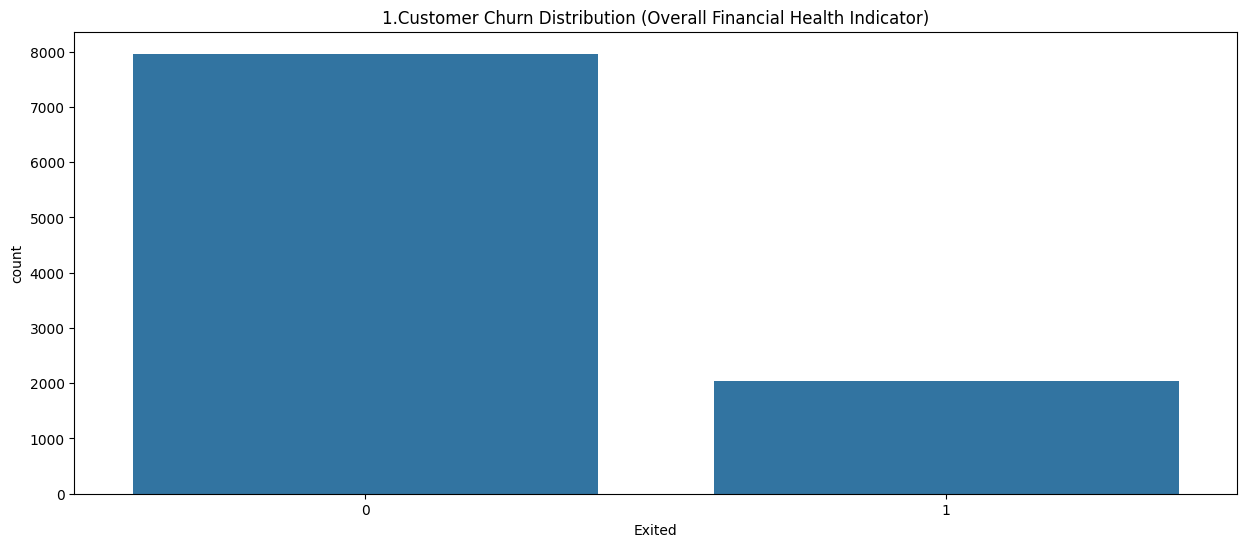

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.countplot(data = df , x='Exited')
plt.title(f'{plot_no}.Customer Churn Distribution (Overall Financial Health Indicator)')
show_fig
plot_no+=1

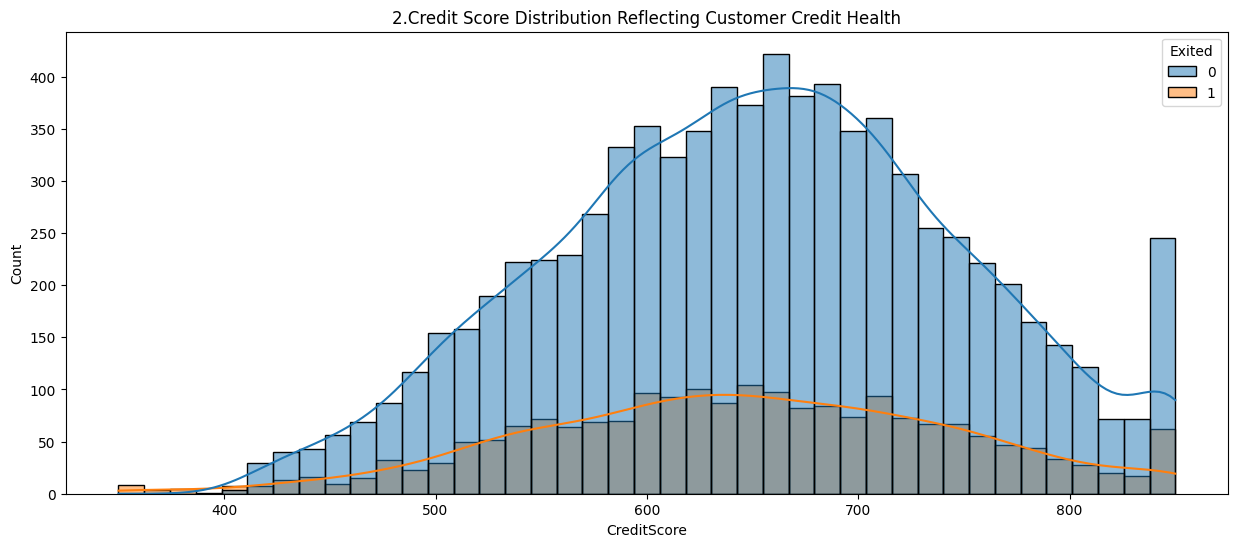

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.histplot(data = df , x='CreditScore' ,hue='Exited', kde=True)
plt.title(f'{plot_no}.Credit Score Distribution Reflecting Customer Credit Health')
show_fig
plot_no+=1

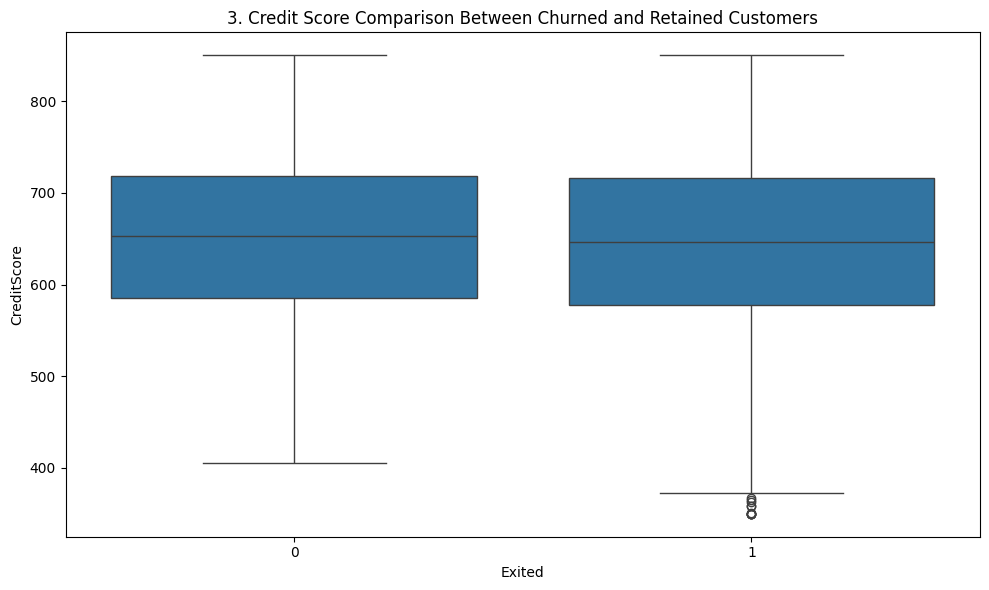

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="CreditScore")
plt.title(f'{plot_no}. Credit Score Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1

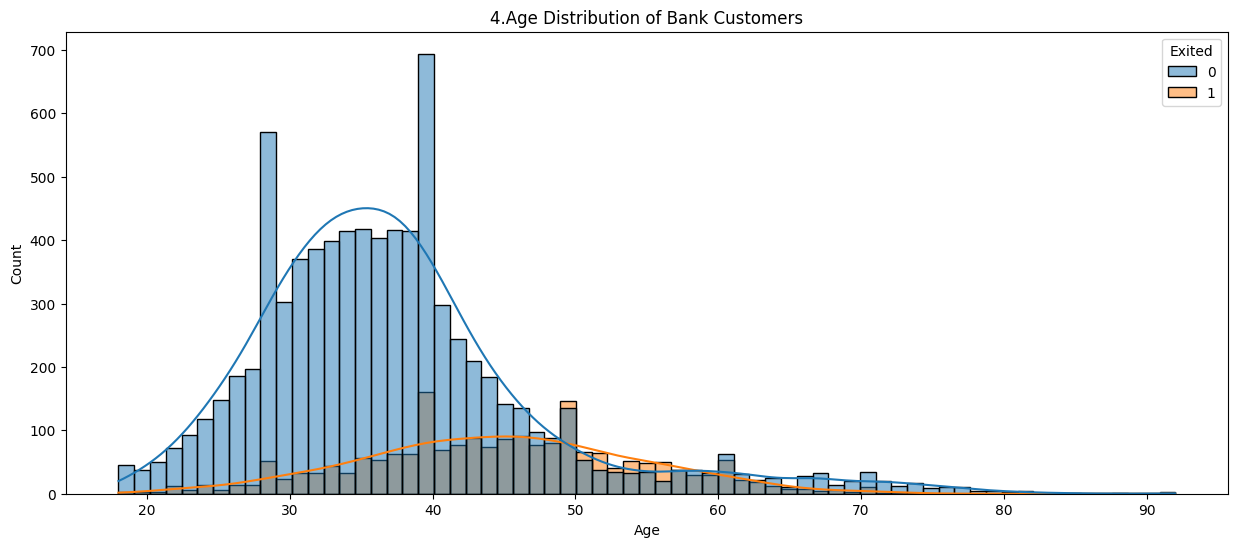

In [ ]:
fig = plt.figure(figsize=(15,6))
sns.histplot(data = df , x='Age',hue='Exited' , kde=True)
plt.title(f'{plot_no}.Age Distribution of Bank Customers')
show_fig
plot_no+=1

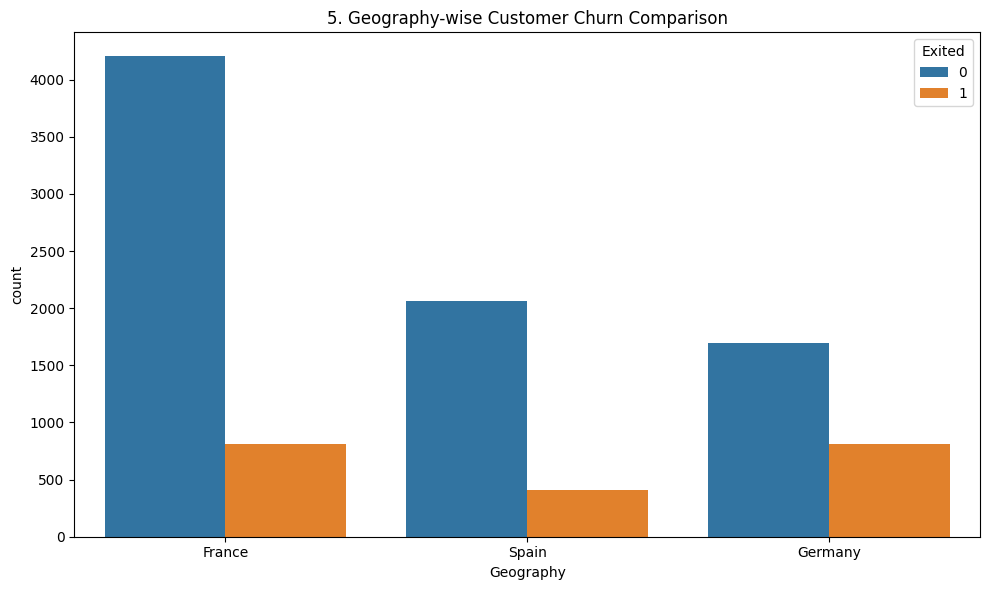

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Geography", hue="Exited")
plt.title(f'{plot_no}. Geography-wise Customer Churn Comparison')
show_fig()
plot_no += 1

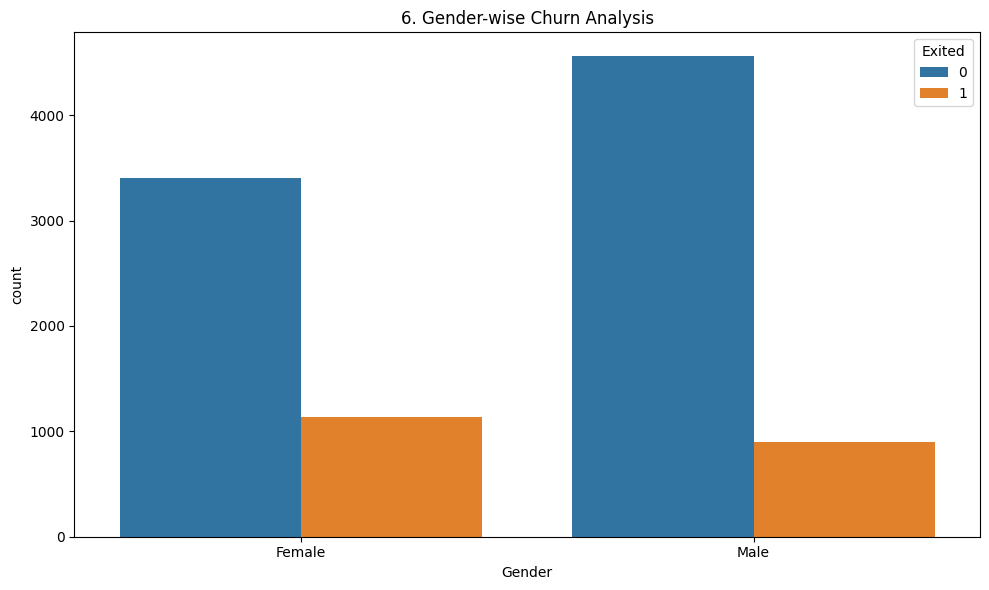

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Gender", hue="Exited")
plt.title(f'{plot_no}. Gender-wise Churn Analysis')
show_fig()
plot_no += 1

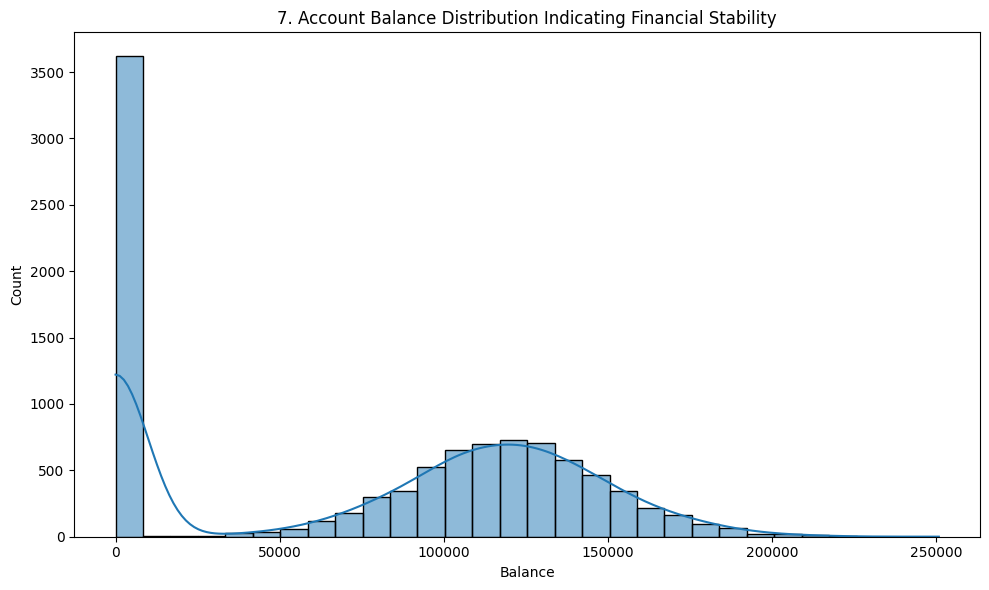

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.histplot(df["Balance"], bins=30, kde=True)
plt.title(f'{plot_no}. Account Balance Distribution Indicating Financial Stability')
show_fig()
plot_no += 1

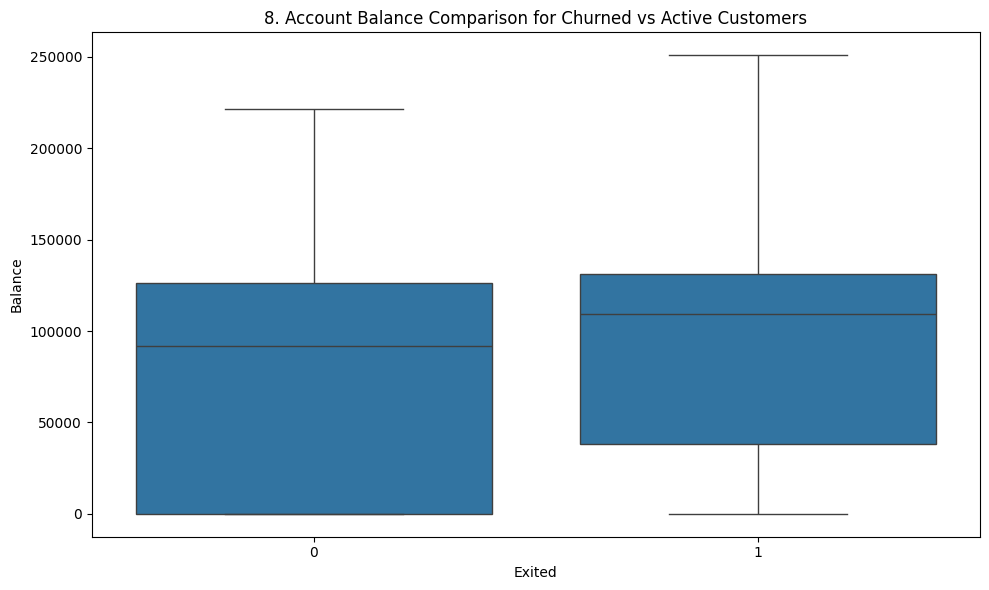

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="Balance")
plt.title(f'{plot_no}. Account Balance Comparison for Churned vs Active Customers')
show_fig()
plot_no += 1

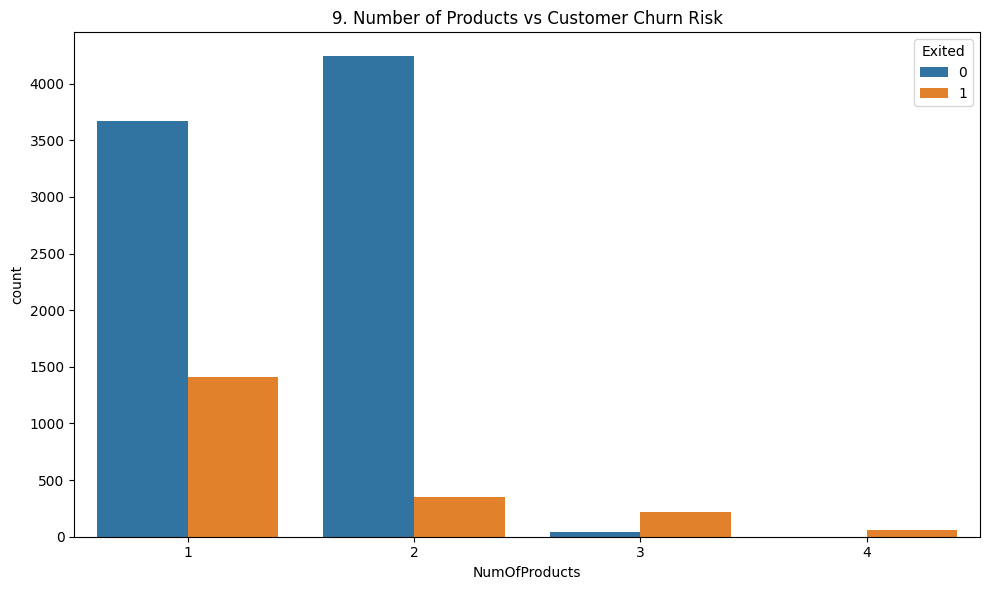

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="NumOfProducts", hue="Exited")
plt.title(f'{plot_no}. Number of Products vs Customer Churn Risk')
show_fig()
plot_no += 1

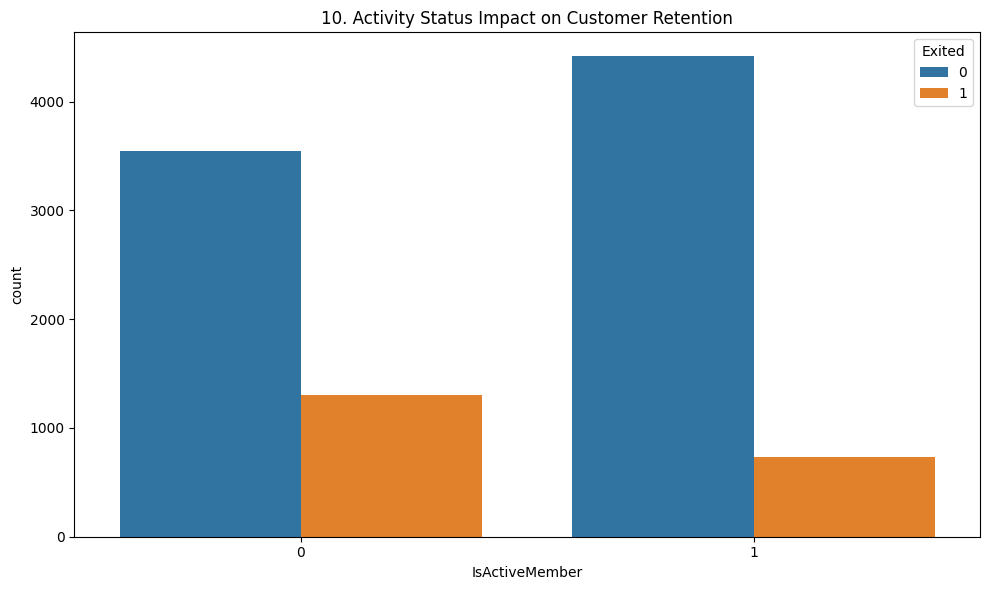

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="IsActiveMember", hue="Exited")
plt.title(f'{plot_no}. Activity Status Impact on Customer Retention')
show_fig()
plot_no += 1

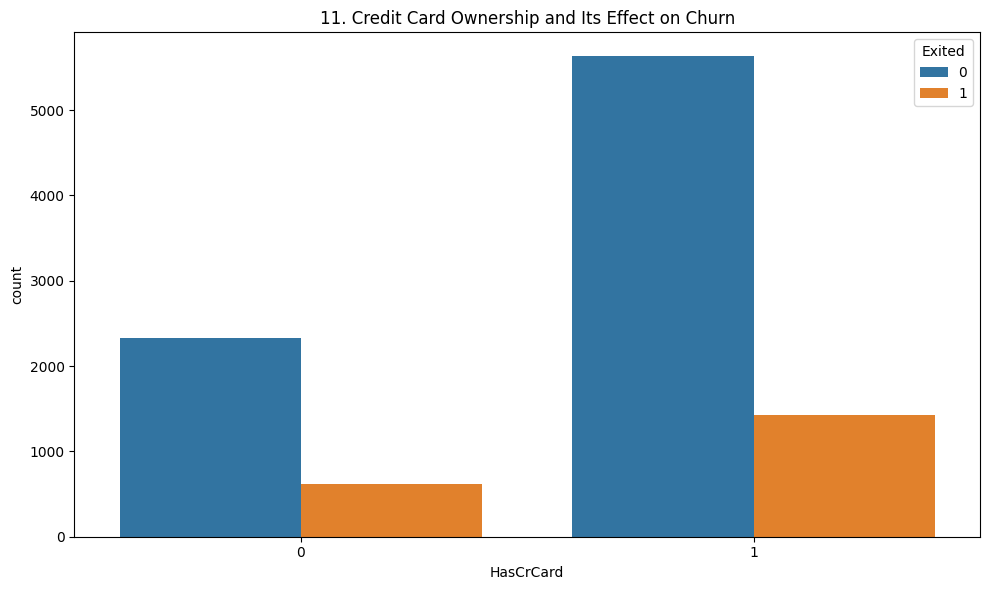

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="HasCrCard", hue="Exited")
plt.title(f'{plot_no}. Credit Card Ownership and Its Effect on Churn')
show_fig()
plot_no += 1

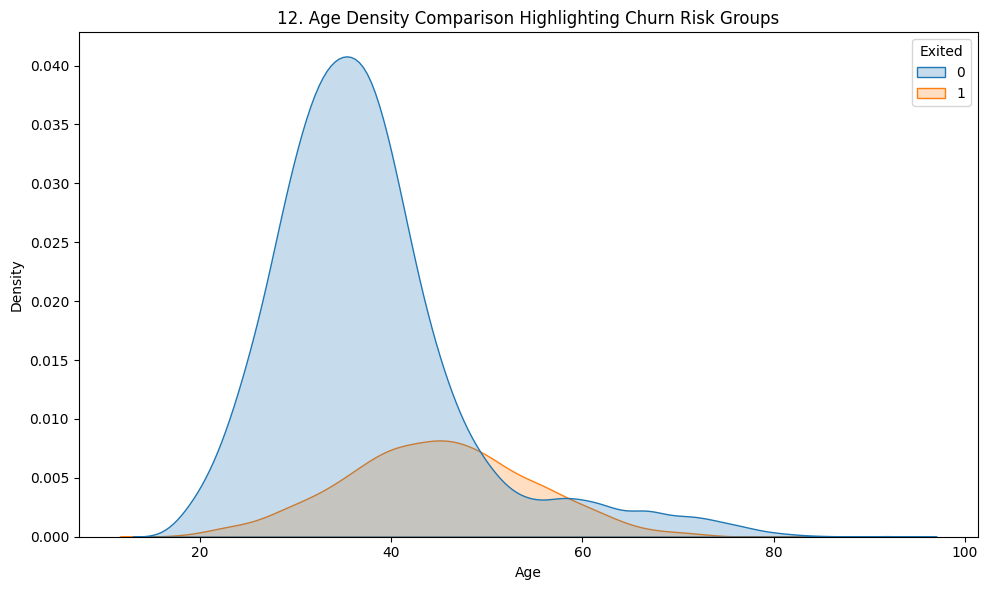

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x="Age", hue="Exited", fill=True)
plt.title(f'{plot_no}. Age Density Comparison Highlighting Churn Risk Groups')
show_fig()
plot_no += 1

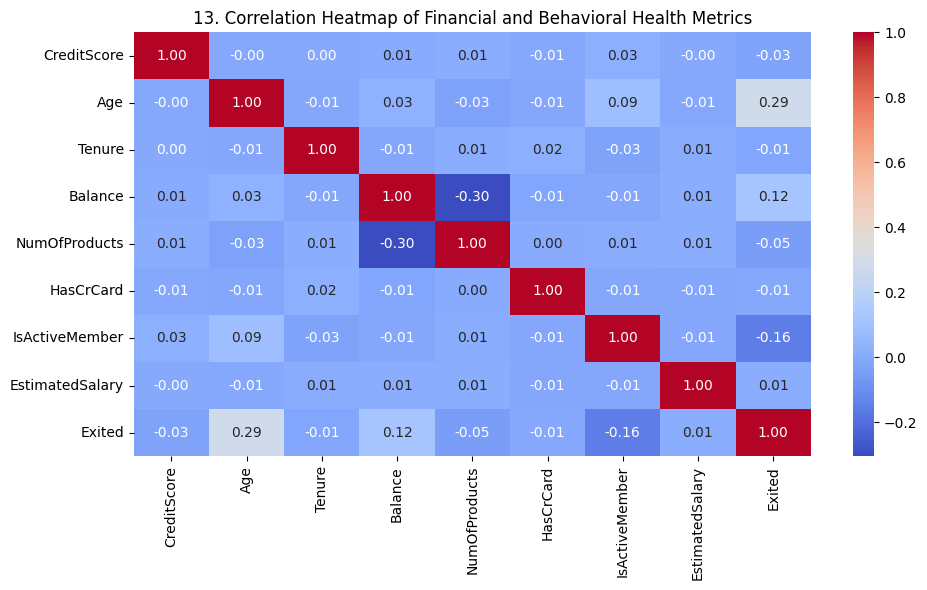

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title(f'{plot_no}. Correlation Heatmap of Financial and Behavioral Health Metrics')
show_fig()
plot_no += 1

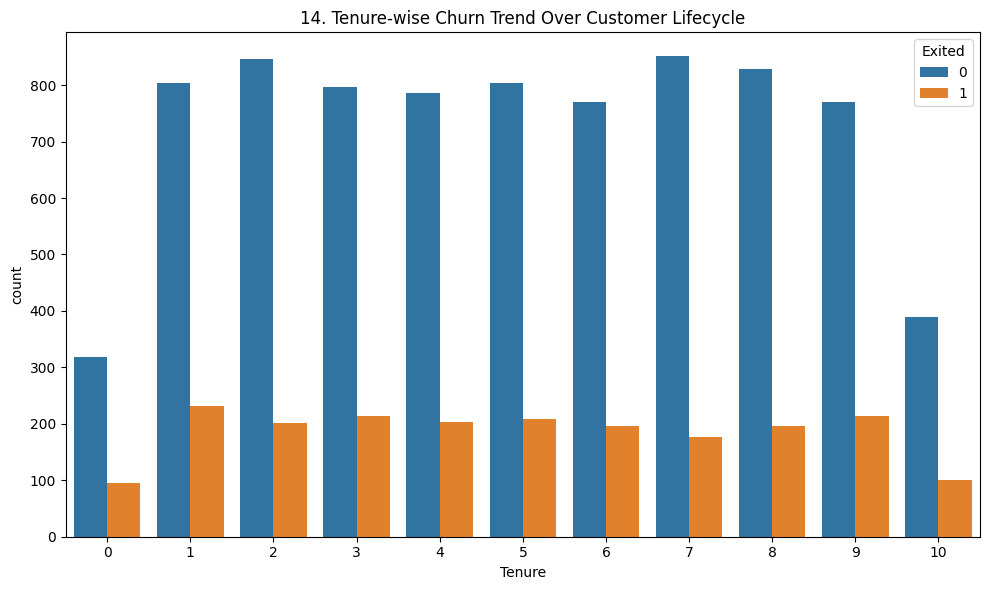

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.countplot(data=df, x="Tenure", hue="Exited")
plt.title(f'{plot_no}. Tenure-wise Churn Trend Over Customer Lifecycle')
show_fig()
plot_no += 1

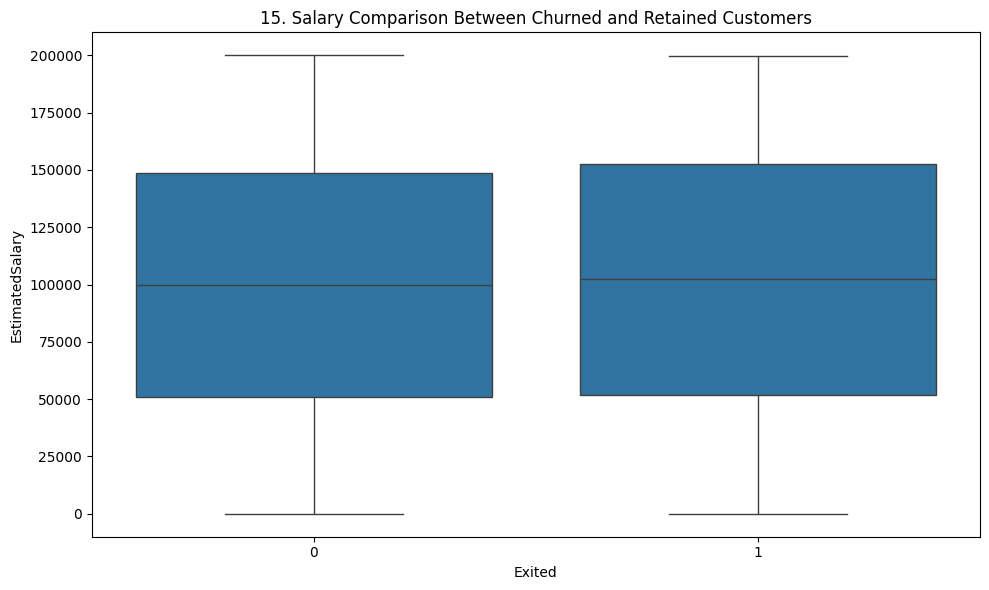

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Exited", y="EstimatedSalary")
plt.title(f'{plot_no}. Salary Comparison Between Churned and Retained Customers')
show_fig()
plot_no += 1

The target variable (Exited) is imbalanced, with approximately 80% non-churn and 20% churn customers.

Age shows a strong positive relationship with churn, where older customers have significantly higher churn probability.

Customers with lower credit scores tend to churn more compared to those with higher scores.

Geography plays a significant role, with customers from certain regions exhibiting higher churn rates.

Active members are far less likely to churn, highlighting the importance of engagement.

Customers with zero balance show a noticeably higher churn tendency.

Number of products is inversely related to churn, where customers with fewer products are more likely to leave.

# **Outlier Detection**

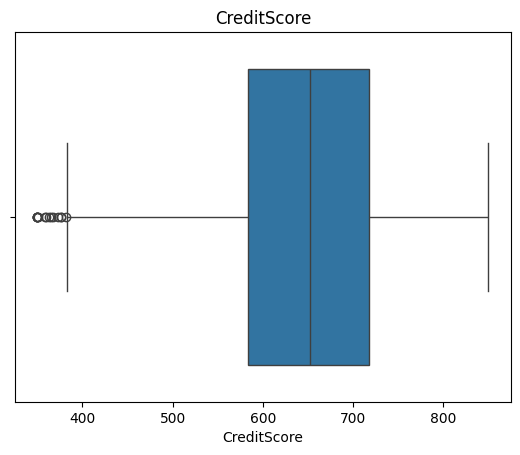

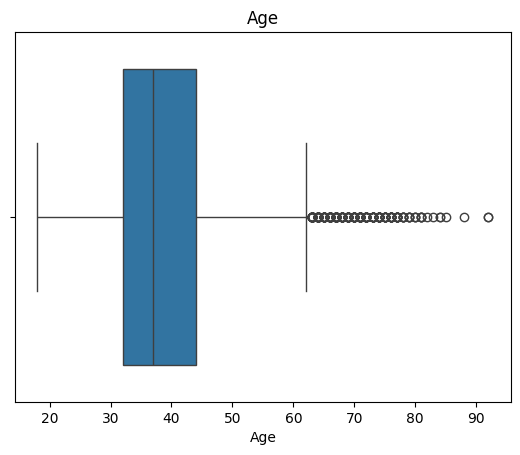

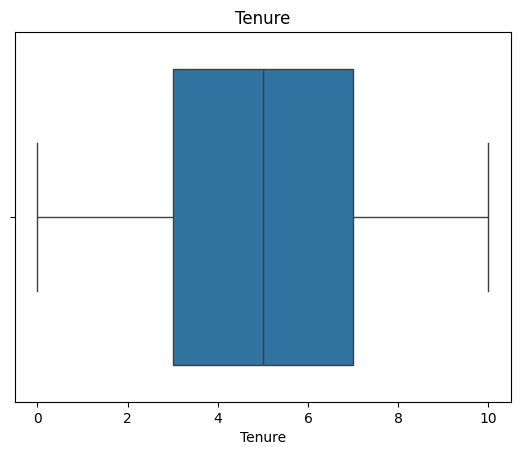

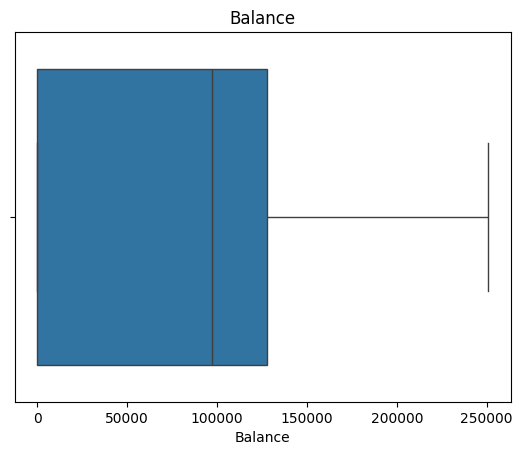

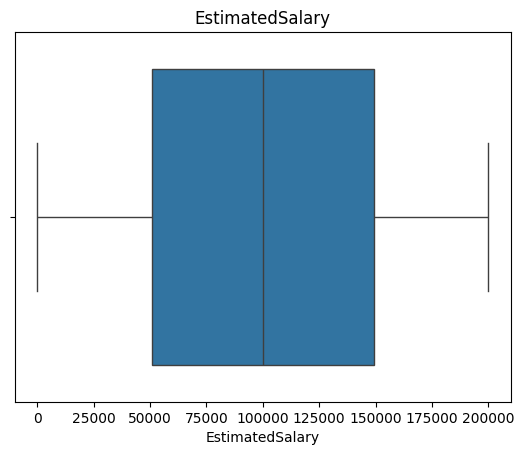

In [ ]:
num_cols = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']

for col in num_cols:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()


# **Feature Engineering**

In [ ]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,30,45,60,100], labels=['Young','Adult','MidAge','Senior'])


In [ ]:
df['ZeroBalance'] = (df['Balance'] == 0).astype(int)


In [ ]:
df['EngagementScore'] = df['NumOfProducts'] + df['IsActiveMember']


In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeGroup,ZeroBalance,EngagementScore
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adult,1,2
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adult,0,2
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adult,0,3
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Adult,1,2
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adult,0,2


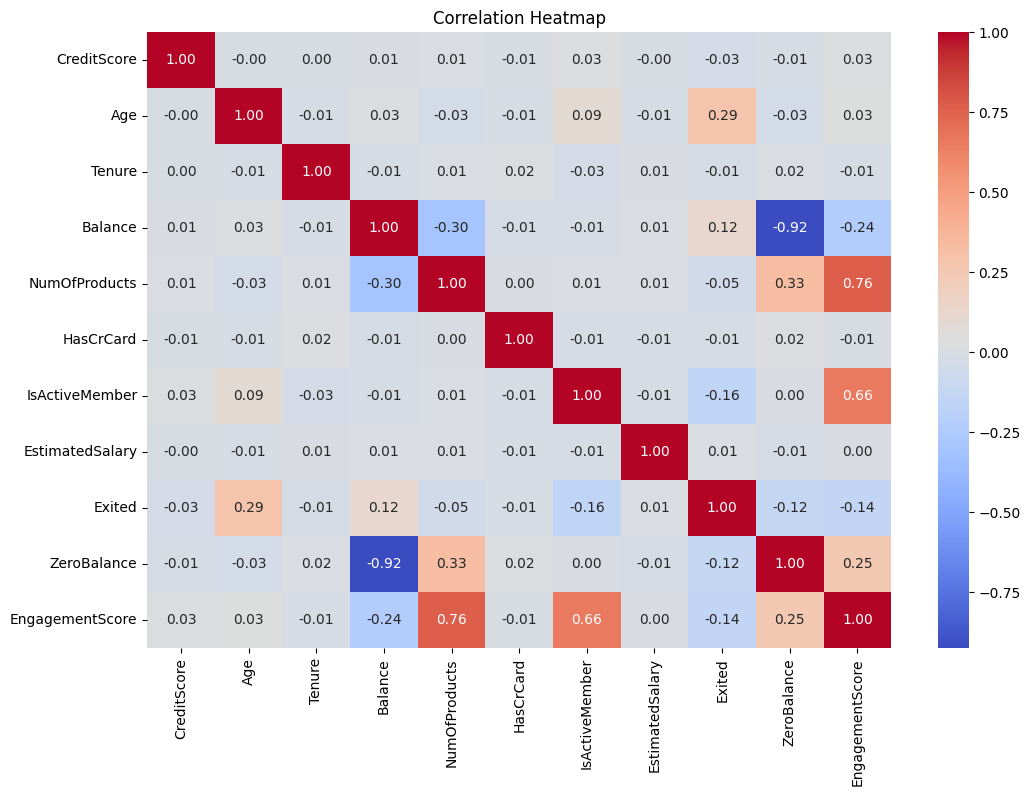

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


# **Train Test Splits**

In [ ]:
x = df.drop(columns='Exited')
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import OneHotEncoder , StandardScaler

In [ ]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape

(8000, 13)

# **ColumnTransformer(OHE & StandardScaler)**

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('ohe' , OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore') , ['Geography','Gender','AgeGroup'])
    # ('standardization' ,StandardScaler(),[])
],remainder=StandardScaler()
)

In [ ]:
x_train_scaled = preprocessor.fit_transform(x_train)
x_test_scaled = preprocessor.transform(x_test)

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.9/413.9 kB 15.4 MB/s eta 0:00:00


In [64]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import  classification_report , confusion_matrix ,roc_curve, auc , roc_auc_score

# **#Logistic regression with optuna**

In [ ]:
#Logistic regression with optuna
def objective_logreg(trial):

    penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
    C = trial.suggest_float("C", 0.001, 10, log=True)
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    class_weight = trial.suggest_categorical("class_weight", [None, "balanced"])
    max_iter = trial.suggest_int("max_iter", 200, 1000)

    model = LogisticRegression(
        penalty=penalty,
        C=C,
        solver=solver,
        class_weight=class_weight,
        max_iter=max_iter
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()


    return score



# run the study

study_logreg = optuna.create_study(direction="maximize")
study_logreg.optimize(objective_logreg, n_trials=50)

print("Best Logistic Regression Params:", study_logreg.best_params)
print("Best F1 Score:", study_logreg.best_value)


[I 2026-02-12 06:52:36,585] A new study created in memory with name: no-name-1bb6ef86-ad8c-4fab-9abd-878591737436
[I 2026-02-12 06:52:37,034] Trial 0 finished with value: 0.4204499513979439 and parameters: {'penalty': 'l1', 'C': 0.5764085132770007, 'solver': 'saga', 'class_weight': None, 'max_iter': 450}. Best is trial 0 with value: 0.4204499513979439.
[I 2026-02-12 06:52:37,181] Trial 1 finished with value: 0.5094755132854606 and parameters: {'penalty': 'l1', 'C': 0.2022152544608101, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 554}. Best is trial 1 with value: 0.5094755132854606.
[I 2026-02-12 06:52:37,317] Trial 2 finished with value: 0.41911482459197574 and parameters: {'penalty': 'l1', 'C': 0.426372059026551, 'solver': 'liblinear', 'class_weight': None, 'max_iter': 256}. Best is trial 1 with value: 0.5094755132854606.
[I 2026-02-12 06:52:37,428] Trial 3 finished with value: 0.4175315707460904 and parameters: {'penalty': 'l2', 'C': 0.20634239407810007, 'solver': '

Best Logistic Regression Params: {'penalty': 'l2', 'C': 3.581666114583704, 'solver': 'saga', 'class_weight': 'balanced', 'max_iter': 334}
Best F1 Score: 0.5111145981369392


# **#RandomForestClassifier with optuna**

In [ ]:
#RandomForestClassifier with optuna
def objective_rf(trial):

    n_estimators = trial.suggest_int("n_estimators", 100, 500)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 10)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 10)
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        class_weight="balanced",
        random_state=42
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()

    return score

#run the study

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50)

print("Best Random Forest Params:", study_rf.best_params)
print("Best F1 Score:", study_rf.best_value)


[I 2026-02-12 06:53:27,359] A new study created in memory with name: no-name-4706abe6-8f1d-4435-a3c1-d0a15d130225
[I 2026-02-12 06:53:48,768] Trial 0 finished with value: 0.6114459839551871 and parameters: {'n_estimators': 399, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 5, 'bootstrap': False}. Best is trial 0 with value: 0.6114459839551871.
[I 2026-02-12 06:54:09,731] Trial 1 finished with value: 0.6180729909180378 and parameters: {'n_estimators': 376, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 4, 'bootstrap': True}. Best is trial 1 with value: 0.6180729909180378.
[I 2026-02-12 06:54:16,651] Trial 2 finished with value: 0.5825655631734207 and parameters: {'n_estimators': 133, 'max_depth': 19, 'min_samples_split': 4, 'min_samples_leaf': 1, 'bootstrap': True}. Best is trial 1 with value: 0.6180729909180378.
[I 2026-02-12 06:54:47,204] Trial 3 finished with value: 0.6213747267681973 and parameters: {'n_estimators': 413, 'max_depth': 16, 'min_samples_spli

Best Random Forest Params: {'n_estimators': 306, 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 4, 'bootstrap': True}
Best F1 Score: 0.6222193629300453


# **#xgboostClassifier with optuna**

In [49]:
#xgboost with optuna
def objective_xgb(trial):

    n_estimators = trial.suggest_int("n_estimators", 200, 1000)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 10)

    subsample = trial.suggest_float("subsample", 0.6, 1.0)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0.6, 1.0)

    reg_alpha = trial.suggest_float("reg_alpha", 0, 5)
    reg_lambda = trial.suggest_float("reg_lambda", 0, 5)

    scale_pos_weight = trial.suggest_float("scale_pos_weight", 2, 6)

    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        eval_metric="logloss"
    )

    score = cross_val_score(
        model,
        x_train_scaled,
        y_train,
        cv=5,
        scoring="f1"
    ).mean()

    return score

#run the study
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best XGBoost Params:", study_xgb.best_params)
print("Best F1 Score:", study_xgb.best_value)


[I 2026-02-12 07:08:53,707] A new study created in memory with name: no-name-fe677838-d7c7-45f8-a7e1-41f6d2167943
[I 2026-02-12 07:08:55,380] Trial 0 finished with value: 0.5998757677435377 and parameters: {'n_estimators': 412, 'learning_rate': 0.010012558461961177, 'max_depth': 3, 'subsample': 0.8097315065033474, 'colsample_bytree': 0.7755815735893791, 'reg_alpha': 1.478794042844565, 'reg_lambda': 4.133520750374572, 'scale_pos_weight': 3.8019290687668943}. Best is trial 0 with value: 0.5998757677435377.
[I 2026-02-12 07:08:57,621] Trial 1 finished with value: 0.5940217629432946 and parameters: {'n_estimators': 214, 'learning_rate': 0.25492348060316883, 'max_depth': 10, 'subsample': 0.8051692904005792, 'colsample_bytree': 0.7997217298286757, 'reg_alpha': 4.719052700196064, 'reg_lambda': 3.012169198435901, 'scale_pos_weight': 2.289070668269652}. Best is trial 0 with value: 0.5998757677435377.
[I 2026-02-12 07:09:05,281] Trial 2 finished with value: 0.5931040311354424 and parameters: {'n

Best XGBoost Params: {'n_estimators': 212, 'learning_rate': 0.028217100709729877, 'max_depth': 6, 'subsample': 0.7605366554901234, 'colsample_bytree': 0.8042163097904524, 'reg_alpha': 2.52389448148789, 'reg_lambda': 3.28202968978923, 'scale_pos_weight': 2.6640934070672757}
Best F1 Score: 0.6232485573745822


# **Final Comparison**

In [50]:
print("\n===== Final Comparison =====")

print("Logistic Regression Best F1:", study_logreg.best_value)
print("Random Forest Best F1:", study_rf.best_value)
print("XGBoost Best F1:", study_xgb.best_value)



===== Final Comparison =====
Logistic Regression Best F1: 0.5111145981369392
Random Forest Best F1: 0.6222193629300453
XGBoost Best F1: 0.6232485573745822


# **Train the Best Model Again**

# **Best Logistic Regression Model**

For churn prediction, the MOST IMPORTANT thing is:
Catch churners (class = 1)
So maximize Recall(1) and F1-score(1), not just accuracy.

In [51]:
best_params = study_logreg.best_params

best_model_lr = LogisticRegression(
    **best_params
)

best_model_lr.fit(x_train_scaled, y_train)


LogisticRegression(C=3.581666114583704, class_weight='balanced', max_iter=334,
                   solver='saga')

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      1607
           1       0.40      0.69      0.51       393

    accuracy                           0.74      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.74      0.76      2000




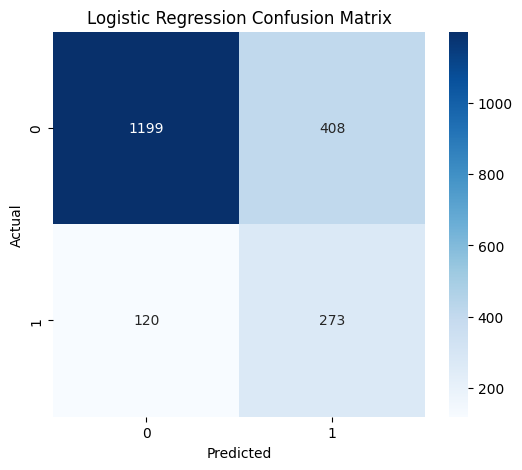

In [52]:
y_pred = best_model_lr.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
print("\n====================")
cm_lr = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Recall(1) = 0.69 ,
Precision(1) = 0.40 ,
Catches churners well
But many false positives

# **Best RandomForestClassifier model**

In [53]:
best_params = study_rf.best_params

best_model_rf = RandomForestClassifier(
    **best_params,
    random_state=42,
    class_weight="balanced"
)

best_model_rf.fit(x_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=13,
                       min_samples_leaf=4, min_samples_split=8,
                       n_estimators=306, random_state=42)

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      1607
           1       0.60      0.66      0.63       393

    accuracy                           0.85      2000
   macro avg       0.76      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



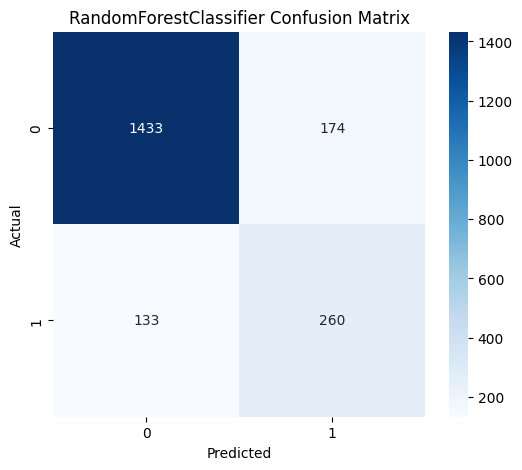

In [54]:
y_pred = best_model_rf.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title("RandomForestClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Recall(1) = 0.66
Precision(1) =0.60
Balanced
Much fewer false alarms

# **Best XGBoostClassifier Model**

In [55]:
best_params = study_xgb.best_params

best_model_xgb = XGBClassifier(
    **best_params,
    random_state=42,
    eval_metric="logloss"
)

best_model_xgb.fit(x_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8042163097904524, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.028217100709729877,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=212, n_jobs=None,
              num_parallel_tree=None, ...)

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.60      0.70      0.65       393

    accuracy                           0.85      2000
   macro avg       0.76      0.79      0.77      2000
weighted avg       0.86      0.85      0.85      2000



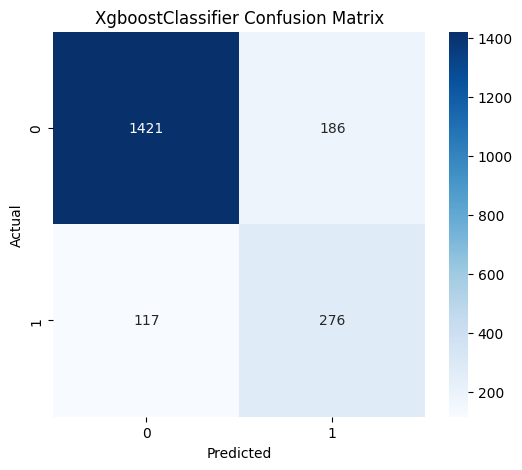

In [56]:
y_pred = best_model_xgb.predict(x_test_scaled)

print(classification_report(y_test, y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Recall(1) = 0.70
Precision(1) = 0.60
Best recall
Good precision
Best overall tradeoff

# **Lets Compare all three**

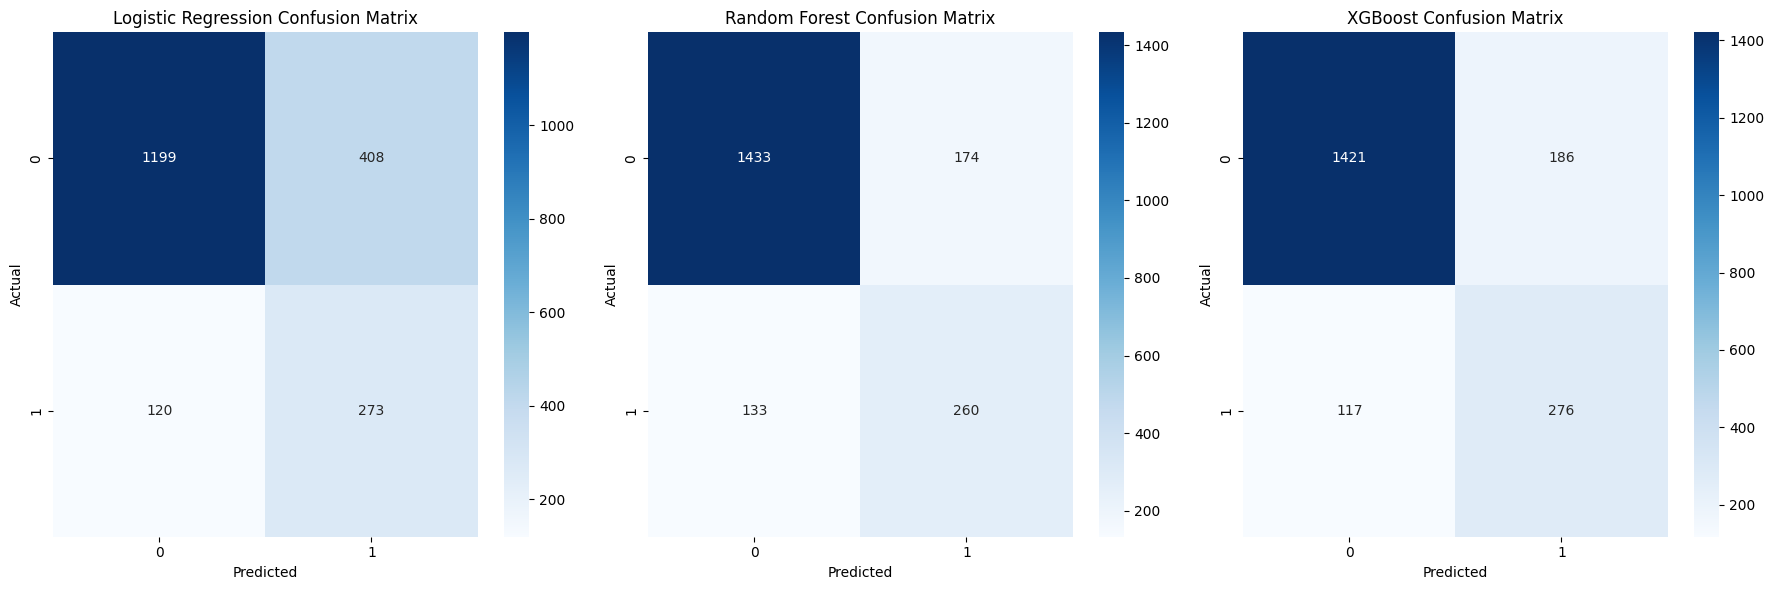

In [57]:
cm_list = [cm_lr, cm_rf, cm_xgb]
model_names = ["Logistic Regression", "Random Forest", "XGBoost"]

# Create subplots
fig, axes = plt.subplots(1, len(cm_list), figsize=(18,6))  # 1 row, 3 columns

for ax, cm, name in zip(axes, cm_list, model_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Confusion Matrix", fontsize=12)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

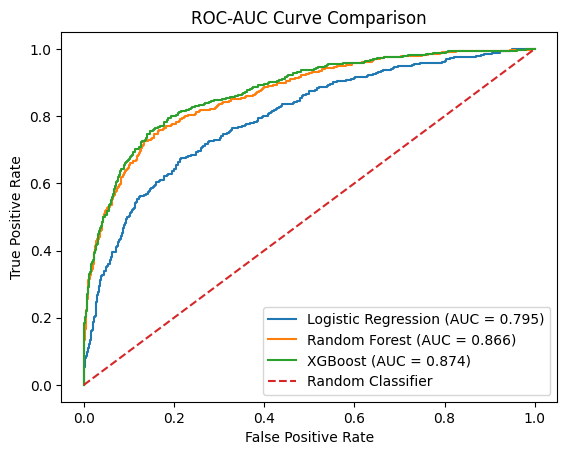

In [69]:
# Predict probabilities
y_proba_lr  = best_model_lr.predict_proba(x_test_scaled)[:, 1]
y_proba_rf = best_model_rf.predict_proba(x_test_scaled)[:, 1]
y_proba_xgb = best_model_xgb.predict_proba(x_test_scaled)[:, 1]

# ROC values
fpr_lr,  tpr_lr,  _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# AUC scores
auc_lr  = roc_auc_score(y_test, y_proba_lr)
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

# Plot
plt.figure()
plt.plot(fpr_lr,  tpr_lr,  label=f"Logistic Regression (AUC = {auc_lr:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.3f})")

# Random baseline
plt.plot([0,1], [0,1], linestyle="--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve Comparison")
plt.legend()
plt.show()


XGBoost minimizes missed churners (False Negatives) while keeping false alarms reasonably low, making it the most effective model for churn prevention strategies.

Among all models, XGBoost delivered the best trade-off between recall and precision for churn prediction, making it the most suitable model for deployment.

# **Threshold tuning (0.5 → 0.35) of xgboost**

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1607
           1       0.47      0.81      0.60       393

    accuracy                           0.78      2000
   macro avg       0.71      0.80      0.73      2000
weighted avg       0.85      0.78      0.80      2000



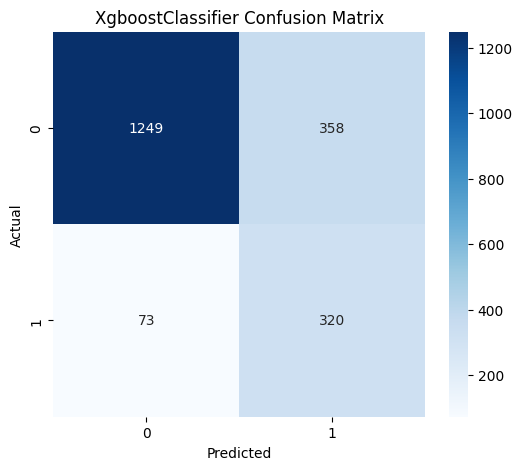

In [58]:
y_prob = best_model_xgb.predict_proba(x_test_scaled)[:,1]
y_pred = (y_prob > 0.35).astype(int)

print(classification_report(y_test, y_pred))
cm_xgb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

After threshold tuning, the model significantly improved churn detection recall from ~70% to 81%, reducing missed churn cases by 38%, which directly improves retention campaign effectiveness and revenue preservation.

# **Make the Pipeline**

In [60]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(
    preprocessor,
    best_model_xgb
)

pipe.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Geography', 'Gender',
                                                   'AgeGroup'])])),
                ('xgbclassifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=...
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.028217100709729877, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=6,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=212,
                               n_jobs=None, num_parallel_tree=None, ...))])

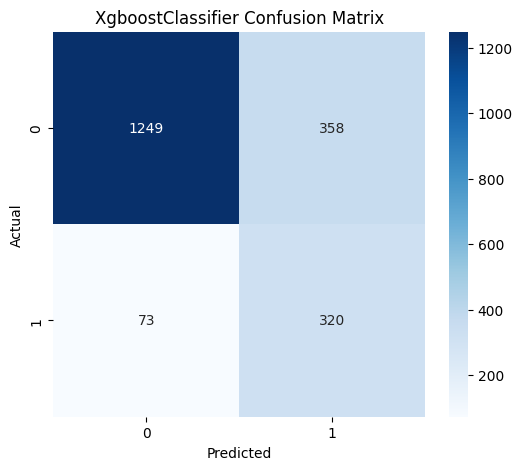

In [61]:
y_prob = pipe.predict_proba(x_test)[:, 1]
threshold = 0.35
y_pred = (y_prob > threshold).astype(int)
cm_pipe = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm_pipe, annot=True, fmt='d', cmap='Blues')
plt.title("XgboostClassifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Pick the model**

In [62]:
import joblib

joblib.dump(pipe, "churn_pipeline.pkl")


['churn_pipeline.pkl']